In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import upsetplot
import os
import warnings
warnings.simplefilter('ignore')

In [10]:
os.makedirs('../Figure/Supplementary Figure1', exist_ok=True)

# Load raw_data

In [11]:
# KZFP ChIP-seq metadata
KZFP_metadata = pd.read_csv('../data/ChIP-seq/KZFP_ChIP-seq_metadata.csv')
display(KZFP_metadata.head())

,KZFP accession,KZFP gene symbol,KZFP experiment,KZFP dataset origin,KZFP assay,KZFP run type,KZFP Cell type,KZFP Cell type.1,KZFP control,Number of raw peak,Number of filtering peak,median of KZFP score,median of signal value,median of peak length
0,SRR5197034,HKR1,GSE78099,Tronolab,ChIP-exo,single-ended,HEK293,HEK293,True,432,307.0,98.0,8.13530,162.0
1,SRR5197035,PRDM9,GSE78099,Tronolab,ChIP-exo,single-ended,HEK293,HEK293,True,1496653,408003.0,70.0,5.51505,119.0
2,SRR5197036,RBAK,GSE78099,Tronolab,ChIP-exo,single-ended,HEK293,HEK293,True,1237,716.0,85.0,7.76903,158.5
3,SRR5197037,ZFP14,GSE78099,Tronolab,ChIP-exo,single-ended,HEK293,HEK293,True,1934,899.0,83.0,7.90011,153.0
4,SRR5197038,ZFP1,GSE78099,Tronolab,ChIP-exo,single-ended,HEK293,HEK293,True,146,69.0,81.0,7.95009,118.0


In [12]:
# KZFP metadata
KZFP_dataset_df = pd.read_csv('../data/ChIP-seq/KZFP_metadata.csv', index_col=0)
display(KZFP_dataset_df.head())

,gene_name,gene_id,classification (Genome research),Age,Age (Genome research),Age adjusted,Species,KRAB domain,interactK1,interact with,Number of ZNFs,z_C2H2_miss,cluster
PRDM7,NaN,NaN,protein_coding,NaN,352.0,352.0,NaN,NaN,NaN,NaN,NaN,NaN,noCluster
ZNF705A,ZNF705A,ENSG00000196946,protein_coding,0.0,312.0,312.0,Human,NaN,Not in database,Not in database,3.0,-0.910143,noCluster
ZNF705B,ZNF705B,ENSG00000215356,protein_coding,0.0,312.0,312.0,Human,NaN,Not in database,Not in database,3.0,NaN,noCluster
ZNF705G,ZNF705G,ENSG00000215372,protein_coding,0.0,312.0,312.0,Human,NaN,Not in database,Not in database,2.0,6.659968,noCluster
ZNF212,ZNF212,ENSG00000170260,protein_coding,179.2,312.1,312.0,Platypus,NaN,NO,NaN,3.0,-0.910143,chr7.3


# Supplementary Fig.1A

array([361,  17])

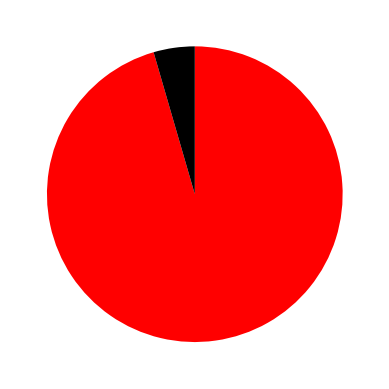

In [13]:
fig = plt.figure()

KZFP_dataset_df_protein = KZFP_dataset_df[(KZFP_dataset_df['classification (Genome research)']=='protein_coding')]
KZFP_metadata_fil = KZFP_metadata[KZFP_metadata['KZFP gene symbol'].isin(KZFP_dataset_df_protein.index)]
data = KZFP_dataset_df_protein.index.to_frame()[0].isin(KZFP_metadata_fil['KZFP gene symbol']).value_counts()
value = data.values
plt.pie(value, counterclock=False, startangle=90, colors=['red', 'black'])

plt.savefig('../Figure/Supplementary Figure1/Supplementary Figure1A.png', bbox_inches='tight', dpi=300)
fig.savefig('../Figure/Supplementary Figure1/Supplementary Figure1A.pdf', bbox_inches='tight', transparent=True, dpi=300)
data.values


# Supplementary Fig.1B

In [14]:
KZFP_dataset_df_protein = KZFP_dataset_df[(KZFP_dataset_df['classification (Genome research)']=='protein_coding')]
print(len(KZFP_dataset_df), len(KZFP_dataset_df_protein))

KZFP_metadata_fil = KZFP_metadata[KZFP_metadata['KZFP gene symbol'].isin(KZFP_dataset_df_protein.index)]
print(len(KZFP_metadata), len(KZFP_metadata_fil))

497 378
1121 1051


In [15]:
experiment_list = pd.DataFrame(np.where(KZFP_metadata_fil['KZFP dataset origin']=='ENCODE', 'ENCODE', KZFP_metadata_fil['KZFP experiment']), columns=['experiment'])
crosstab = pd.crosstab(KZFP_metadata_fil['KZFP gene symbol'].values, experiment_list['experiment'])
upset = (crosstab>=1).value_counts()

<Figure size 640x480 with 0 Axes>

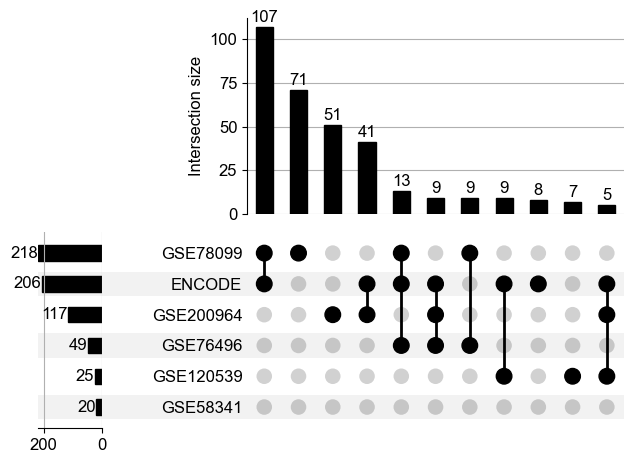

In [16]:
fig = plt.figure()
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

upsetplot.plot(upset, sort_by='cardinality', sort_categories_by='-cardinality', min_degree=1, min_subset_size=5, facecolor='black', with_lines=True, show_counts=True)

plt.rcParams["font.family"] = "Arial"
plt.savefig('../Figure/Supplementary Figure1/Supplementary Figure1B.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure1/Supplementary Figure1B.pdf', bbox_inches='tight', transparent=True, dpi=300)
